In [1]:
#Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [2]:
df = pd.read_csv("training.1600000.processed.noemoticon.csv",encoding="ISO-8859-1",names=["target", "ids", "date", "flag", "user", "text"])
#TEMPORARY EDIT TO CHANGE DATA SAMPLE SIZE
################################################################

df = df.dropna()
del df["flag"]
del df["user"]
del df["date"]
if (len(df["target"].unique()) == 1):
    del df["target"]
else:
    print(df["target"].unique())
df.head()

df = df.replace(4, 1)




#We have train and test, now we need to...
# Today's goal: Get a model, train it, test it
df.head()

[0 4]


,target,ids,text
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,is upset that he can't update his Facebook by ...
2,0,1467810917,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,my whole body feels itchy and like its on fire
4,0,1467811193,"@nationwideclass no, it's not behaving at all...."


In [4]:
def form_sentence(tweet):
    tweet_blob = TextBlob(tweet)
    return ' '.join(tweet_blob.words)


In [5]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
    return clean_mess


In [6]:
from nltk.stem import PorterStemmer
def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english') and word[0] != '@']
    return clean_mess


In [19]:
def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
tweet_list = 'I was playing with my friends with whom I used to play, when you called me yesterday'.split()
print(normalization(tweet_list))

['I', 'be', 'play', 'with', 'my', 'friends', 'with', 'whom', 'I', 'use', 'to', 'play,', 'when', 'you', 'call', 'me', 'yesterday']


In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer='word')),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])


In [9]:
df = df.sample(frac = 0.5)

In [16]:
cleandata = []
for sentence in df["text"].tolist():
    listofwords = no_user_alpha(sentence)
    cleandata.append(" ".join(listofwords))

df["new_data"] = cleandata
df.head()
    
    
df.to_csv('temporary.csv')      


,target,ids,text,new_data
474814,0,2177433549,"if study had a face, id stab it. :@ p.s does a...",study id stab anyone know food places uni open...
318781,0,2002898590,says people change http://plurk.com/p/xvrt5,says people change
55172,0,1684981147,trying to study for his stat exam tomorrow...b...,trying study stat exam lost less inspiration
1217031,1,1989694957,Watching Disco on my PC,Watching Disco PC
1220989,1,1990110736,@Ankit_A Best of Luck for that,Best Luck


In [17]:
train_tweets = df.sample(frac = 0.8)
test_tweets = df.drop(train_tweets.index)


print(df['text'].size)
print(df['new_data'].size)




32000
32000


In [18]:
msg_train, msg_test, label_train, label_test = train_test_split(df['new_data'], df['target'], test_size=0.2)
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))

159257                                        anatomy making
117323                    expeditor make wait next month get
1000605                                                going
1591337                                                Thank
572282     watching Hangover say movie makes miss used vegas
                                 ...                        
1431945                                           make yummy
1190869                                           said Thank
944987                         love Big Mexican behaves visa
280621     urgent need switch fan tropical equatorial cli...
704022     Mass confusion multiplies numbers grow world n...
Name: new_data, Length: 25600, dtype: object
              precision    recall  f1-score   support

           0       0.76      0.69      0.73      3577
           1       0.65      0.73      0.69      2823

    accuracy                           0.71      6400
   macro avg       0.71      0.71      0.71      6400
weighted avg

In [ ]:
print("Training Size {}, Test Size {}".format(label_train.size,label_test.size))


159257                                        anatomy making
117323                    expeditor make wait next month get
1000605                                                going
1591337                                                Thank
572282     watching Hangover say movie makes miss used vegas
                                 ...                        
1431945                                           make yummy
1190869                                           said Thank
944987                         love Big Mexican behaves visa
280621     urgent need switch fan tropical equatorial cli...
704022     Mass confusion multiplies numbers grow world n...
Name: new_data, Length: 25600, dtype: object


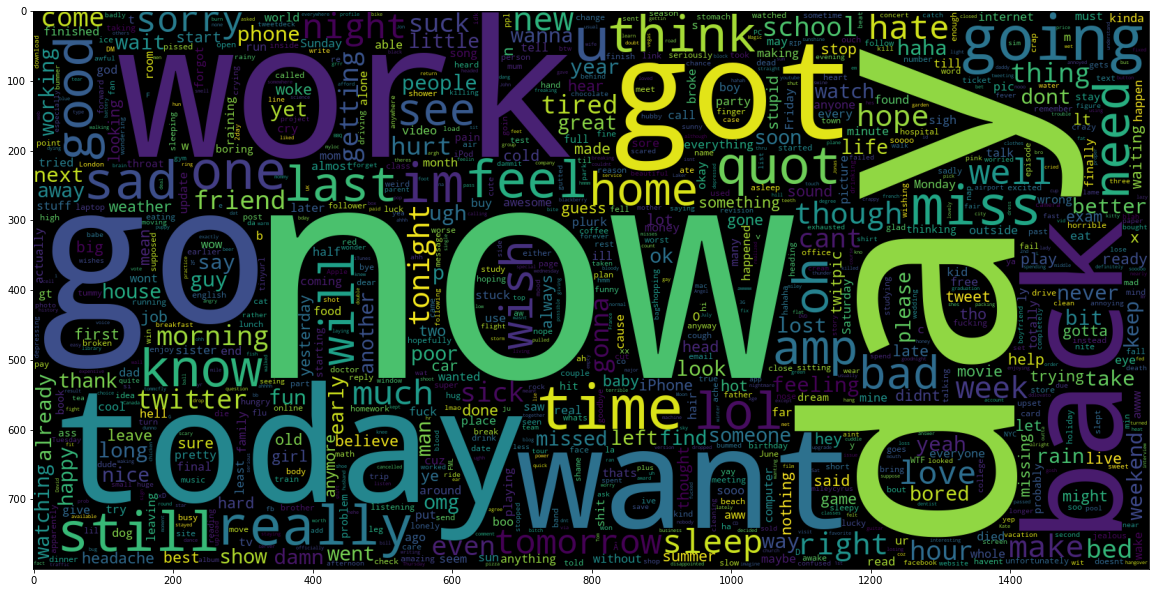

In [30]:
data_pos = df[df['target'] == 1]
data_neg = df[df['target'] == 0]
print(msg_train)
data_neg = data_neg
neg_text = data_neg['text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(neg_text))
plt.imshow(wc)




In [ ]:
def text_processing(tweet):
    
    #Generating the list of words in the tweet (hastags and other punctuations removed)
    def form_sentence(tweet):
        tweet_blob = TextBlob(tweet)
        return ' '.join(tweet_blob.words)
    new_tweet = form_sentence(tweet)
    #Removing stopwords and words with unusual symbols
    def no_user_alpha(tweet):
        tweet_list = [ele for ele in tweet.split() if ele != 'user']
        clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
        clean_s = ' '.join(clean_tokens)
        clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
        return clean_mess
    no_punc_tweet = no_user_alpha(new_tweet)
    
    #Normalizing the words in tweets 
    def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
    
    return normalization(no_punc_tweet)

In [ ]:
train_tweets = train_tweets.sample(frac = 0.1)
test_tweets = train_tweets.drop(train_tweets.index)

train_tweets.size

In [ ]:

train_tweets['parsed_text'] = train_tweets['text'].apply(text_processing)
test_tweets['parsed_text'] = test_tweets['text'].apply(text_processing)

        
    


In [ ]:
X = train_tweets['parsed_text']
y = train_tweets['target']
test = test_tweets['parsed_text']

In [ ]:
train_tweets.head()

In [ ]:
newlist = []
separator = ' '
for sentence in train_tweets["parsed_text"]:
    sent = separator.join(sentence)
    newlist.append(sent)
    

print(len(newlist))
train_tweets['filtered_sentence'] = newlist
print(train_tweets["parsed_text"].size)
train_tweets.head()


In [ ]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(train_tweets['filtered_sentence'], train_tweets['target'], test_size=0.2)

In [ ]:
#Machine Learning Pipeline
from sklearn.feature_extraction.text import CountVectorizer

#Machine Learning Pipeline
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer='word')),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
pipeline.fit(msg_train,label_train)

In [ ]:
predictions = pipeline.predict(msg_test)

print(classification_report(predictions,label_test))
print ('\n')
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))